## Dataset Link : - https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [ ]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader , random_split
import torchvision
from torchvision import datasets , models , transforms
from torchvision.datasets import ImageFolder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
device

device(type='cuda')

In [ ]:
img_size = 200 
image_transform = transforms.Compose([
                                      transforms.Resize((img_size , img_size)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.CenterCrop(180),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.485,0.456,0.406] , std = [0.229,0.224,0.225])
])

## Get the DataSet Path

In [ ]:
train_path = '/content/drive/MyDrive/archive (3).zip (Unzipped Files)/Vegetable Images/train'
test_path = '/content/drive/MyDrive/archive (3).zip (Unzipped Files)/Vegetable Images/test'
val_path = '/content/drive/MyDrive/archive (3).zip (Unzipped Files)/Vegetable Images/validation'

In [ ]:
train_data = ImageFolder(train_path , image_transform)
test_data = ImageFolder(test_path , image_transform)
val_data = ImageFolder(val_path , image_transform)
len(train_data) , len(test_data) , len(val_data)

(13924, 2996, 3000)

In [ ]:
print(train_data.classes)
print(train_data.class_to_idx)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


## Load Data in Batchwise

In [ ]:
train_loader = DataLoader(train_data , batch_size=100 , shuffle = True)
val_loader = DataLoader(val_data , batch_size=100 , shuffle = True)

In [ ]:
for img , label in val_loader:
  print(img.shape)
  break

torch.Size([100, 3, 180, 180])


## Data Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([13, 14,  3, 14,  8, 14,  7,  3,  4,  6,  6, 14,  1,  1,  4,  0, 10,  6,
         2,  2, 10,  1, 14,  5,  0,  8,  2, 11,  1,  2,  8, 13,  2,  4,  8, 12,
         6,  9, 13, 10, 14,  0,  7,  7, 14, 13,  7,  5,  9,  4, 10,  5,  1, 14,
         2,  1,  4,  6,  8, 13,  2, 11, 14, 10,  8,  5,  1, 10, 13,  9,  2,  8,
         5,  3,  8,  9, 10,  1,  3,  4, 11,  3,  2,  8, 10, 10,  3,  4,  0, 13,
         1,  8, 12,  0,  4, 13, 13,  1, 10,  5])


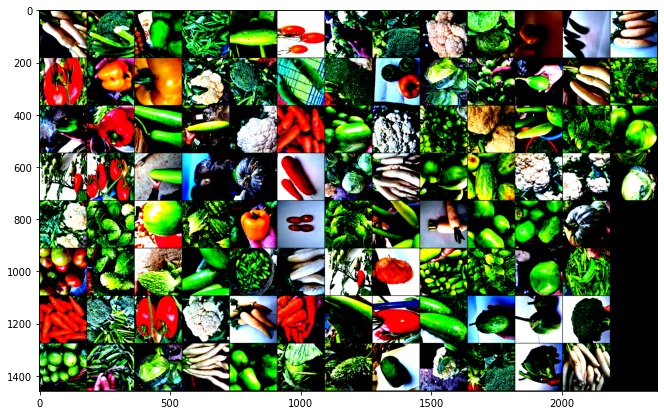

In [ ]:
from torchvision.utils import make_grid
def img_show(data):
  for img , label in data:
    plt.figure(figsize=(20,7))
    plt.imshow(make_grid(img , row = 10).permute(2,1,0))
    print(label)
    break
img_show(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([10, 12,  5,  8,  4,  2, 13,  0,  2, 13,  2,  5, 12,  2,  4,  1,  0, 14,
         7, 10,  5,  7,  6,  4,  8,  3,  3, 11,  8,  0, 13,  6,  4,  2,  8,  4,
         8, 12,  7,  2,  6,  2, 12,  5,  8, 10, 11,  7, 14, 10, 10, 11, 10,  3,
         0,  6, 10,  1,  7,  8,  2, 14,  0, 11, 13,  7,  6, 14,  5,  5,  7, 12,
         8,  6, 13,  5,  3,  9, 11,  4, 11,  8, 13,  4, 11,  8,  2,  3,  3, 10,
        11, 10,  1, 11, 10,  8,  6,  1,  9,  1])


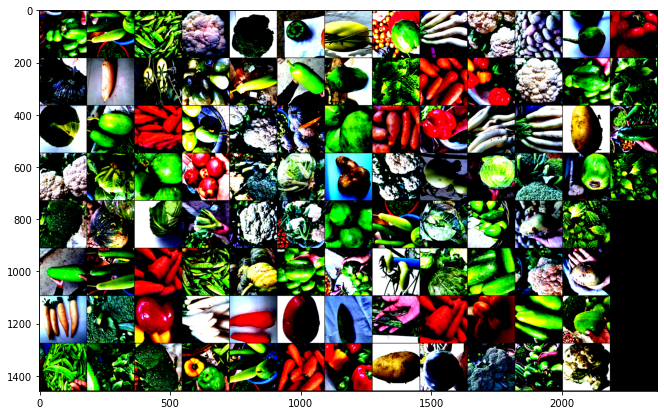

In [ ]:
img_show(val_loader)

## Model create using Transfer learning - Resnet18

In [ ]:
resnet_model = models.resnet18(pretrained=True)
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#  freeze the feature of model 
for params in resnet_model.parameters():
  params.requires_grad = False

In [ ]:
# change the last layer of this model 
resnet_model.fc = nn.Linear(512 ,15)
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def train_model(loss_fun , optimizer , model , epochs = 20):
  training_acc = []
  training_loss = []
  testing_acc = []
  testing_loss = []
  for epoch in range(epochs):
    train_acc = 0.0
    train_loss = 0.0 

    model.train()
    for img , label in train_loader:
      img = img.to(device)
      label = label.to(device)
      optimizer.zero_grad()
      output = model(img)
      loss = loss_fun(output , label)
      loss.backward()
      optimizer.step()
      prediction = torch.argmax(output , 1)
      train_acc += (label == prediction).sum().item()
      train_loss += loss.item()
    training_acc.append(train_acc/len(train_data))
    training_loss.append(train_loss/len(train_loader))

    model.eval()

    test_acc = 0.0
    test_loss = 0.0

    with torch.no_grad():
      for img , label in val_loader:
        img = img.to(device)
        label = label.to(device)

        output = model(img)
        loss = loss_fun(output , label)

        prediction = torch.argmax(output , 1)
        test_acc += (label == prediction).sum().item()
        test_loss += loss.item()
      testing_acc.append(test_acc/len(val_data))
      testing_loss.append(test_loss/len(val_loader))
    print(f"Epochs:{epoch+1}, Training Accuracy:{train_acc/len(train_data):.2f}, Training Loss:{train_loss/len(train_loader):.2f}, Validation Accuracy:{test_acc/len(val_data):2f}, Validation Loss:{test_loss/len(val_loader):.2f}")
  plt.title("Accuracy Vs Epochs")
  plt.plot(range(20), training_acc, label ="Training Accuracy")
  plt.plot(range(epochs), testing_acc, label = "Validation Accuracy")
  plt.legend()
  plt.xlabel("Accuracy")
  plt.ylabel("Epochs")
  plt.show()

  plt.title("Loss Vs Epochs")
  plt.plot(range(epochs), training_loss, label ="Training Loss")
  plt.plot(range(epochs), testing_loss, label = "Validation Loss")
  plt.legend()
  plt.xlabel("Accuracy")
  plt.ylabel("Epochs")
  plt.show()



Epochs:1, Training Accuracy:0.88, Training Loss:0.66, Validation Accuracy:0.976000, Validation Loss:0.20
Epochs:2, Training Accuracy:0.98, Training Loss:0.14, Validation Accuracy:0.986667, Validation Loss:0.10
Epochs:3, Training Accuracy:0.99, Training Loss:0.08, Validation Accuracy:0.990333, Validation Loss:0.07
Epochs:4, Training Accuracy:0.99, Training Loss:0.06, Validation Accuracy:0.992333, Validation Loss:0.06
Epochs:5, Training Accuracy:0.99, Training Loss:0.05, Validation Accuracy:0.991667, Validation Loss:0.05
Epochs:6, Training Accuracy:0.99, Training Loss:0.04, Validation Accuracy:0.991333, Validation Loss:0.04
Epochs:7, Training Accuracy:0.99, Training Loss:0.03, Validation Accuracy:0.994000, Validation Loss:0.03
Epochs:8, Training Accuracy:1.00, Training Loss:0.03, Validation Accuracy:0.994667, Validation Loss:0.03
Epochs:9, Training Accuracy:1.00, Training Loss:0.02, Validation Accuracy:0.996000, Validation Loss:0.03
Epochs:10, Training Accuracy:1.00, Training Loss:0.02, 

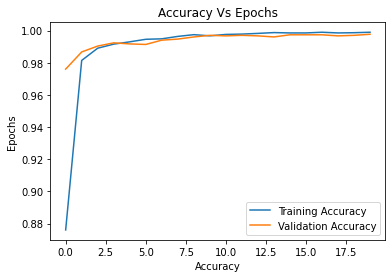

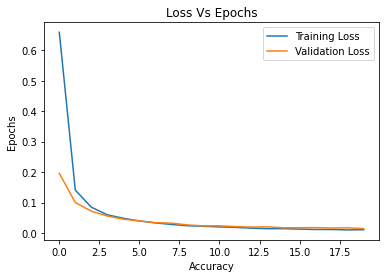

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters() , lr = 0.001)
train_model(loss_func , optimizer , resnet_model , 10)

In [ ]:
def predict_img(img):
  img = img.to(device)
  x = img.unsqueeze(0)
  y = resnet_model(x)
  # plt.imshow(y)
  return test_data.classes[torch.argmax(y ,1)]


In [ ]:
img , label = test_data[0]
print(f"Actual image : {test_data.classes[label]} , Predicted label : {predict_img(img)}")

Actual image : Bean , Predicted label : Bean


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual image : Bean , Predicted label : Bean


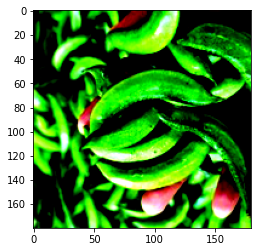

In [ ]:
img , label = test_data[25]
plt.imshow(img.permute(2,1,0))
print(f"Actual image : {test_data.classes[label]} , Predicted label : {predict_img(img)}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual image : Cabbage , Predicted label : Cabbage


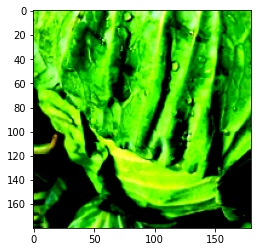

In [ ]:
img , label = test_data[1000]
plt.imshow(img.permute(2,1,0))
print(f"Actual image : {test_data.classes[label]} , Predicted label : {predict_img(img)}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual image : Cucumber , Predicted label : Cucumber


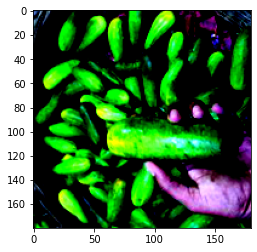

In [ ]:
img , label = test_data[1891]
plt.imshow(img.permute(2,1,0))
print(f"Actual image : {test_data.classes[label]} , Predicted label : {predict_img(img)}")